# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Introduction To Reinforcement Learning. Lessons 9-10</span>

##   &#x1F916; &nbsp; <span style="color:red">Links & Libraries</span>

Reinforcement Learning: An Introduction http://incompleteideas.net/sutton/book/bookdraft2016aug.pdf

POMDP tutorials https://www.techfak.uni-bielefeld.de/~skopp/Lehre/STdKI_SS10/POMDP_tutorial.pdf

POMDP solution methods https://www.techfak.uni-bielefeld.de/~skopp/Lehre/STdKI_SS10/POMDP_solution.pdf

Decision Making under Uncertainty. MDPs and POMDPs http://web.stanford.edu/~mykel/pomdps.pdf

POMDPs https://people.eecs.berkeley.edu/~pabbeel/cs287-fa13/slides/pomdps.pdf

Monte-Carlo Planning in Large POMDPs: http://papers.nips.cc/paper/4031-monte-carlo-planning-in-large-pomdps.pdf

Exact Solutions of Interactive POMDPs Using Behavioral Equivalence
https://www.cs.uic.edu/~piotr/papers/aamas06.pdf

Partially observable Markov decision process https://en.wikipedia.org/wiki/Partially_observable_Markov_decision_process

Partially Observable Markov Decision Processes: A Geometric Technique and Analysis

https://msbfile03.usc.edu/digitalmeasures/zhanghao/intellcont/POMDP-2.pdf

Partially Observed Markov Decision Processes From Filtering to Controlled Sensing
https://vikram.ece.cornell.edu/files/2016/09/problems-1a1izqa.pdf

A Survey of POMDP Solution Techniques https://www.cs.ubc.ca/~murphyk/Papers/pomdp.pdf

A Survey of POMDP Applications http://www.pomdp.org/papers/applications.pdf

SARSOP: Efficient Point-Based POMDP Planning by Approximating Optimally Reachable Belief Spaces
http://www.roboticsproceedings.org/rss04/p9.pdf    

Bayesian Reinforcement Learning http://mlg.eng.cam.ac.uk/rowan/files/BayesianReinforcementLearning.pdf

Model-based Bayesian Reinforcement Learning with Generalized Priors http://cs.brown.edu/~mlittman/theses/asmuth.pdf

Bayesian Reinforcement Learning in Continuous POMDPs with Application to Robot Navigation

http://www.cs.mcgill.ca/~jpineau/files/sross-icra08-bacpomdp.pdf

Gaussian Processes for Machine Learning http://www.gaussianprocess.org/gpml/chapters/

An Introduction to Predictive State Representations (PSR) 

http://users.isr.ist.utl.pt/~mtjspaan/readingGroup/psr-sdmuu-export26022007.pdf

Predictive State Representations: A New Theory for Modeling Dynamical Systems
    
http://people.ee.duke.edu/~lcarin/emag/seminar_presentations/PST1.pdf

Between MDPs and Semi-MDPs: A Framework for Temporal Abstraction in Reinforcement Learning.
    
http://msl.cs.uiuc.edu/~lavalle/cs497/papers/sutton.pdf 

An Introduction to Predictive State Representations (PSR)

http://users.isr.ist.utl.pt/~mtjspaan/readingGroup/psr-sdmuu-export26022007.pdf

Learning Predictive State Representations in Dynamical Systems Without Reset
http://www.machinelearning.org/proceedings/icml2005/papers/124_PredictiveState_WolfeEtAl.pdf

The Utility of Temporal Abstraction in Reinforcement Learning
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.140.3094&rep=rep1&type=pdf

A Julia interface for defining, solving and simulating partially observable Markov decision processes
http://juliapomdp.github.io/POMDPs.jl/latest/

Approximate POMDP Planning Software http://bigbird.comp.nus.edu.sg/pmwiki/farm/appl/

Modeling Agents with Probabilistic Programs http://agentmodels.org/chapters/3d-reinforcement-learning.html

WebPPL Documentation: http://webppl.readthedocs.io/en/master/

POMDPy: https://github.com/pemami4911/POMDPy

pomdp-solve: http://www.pomdp.org/code/

In [7]:
from IPython.core.display import Image

##  &#x1F916; &nbsp;  <span style="color:red"> Lesson 9. Partially Observable MDPs</span>

A **POMDP** models an agent decision process in which it is assumed that the system dynamics are determined by an MDP, but the agent cannot directly observe the underlying state. Instead, it must maintain a probability distribution over the set of possible states, based on a set of observations and observation probabilities, and the underlying MDP.

Formally, a POMDP is a 7-tuple ${\displaystyle (S,A,T,R,\Omega ,O,\gamma )}$, where

- ${\displaystyle S}$ is a set of states,
- ${\displaystyle A}$ is a set of actions,
- ${\displaystyle T}$ is a set of conditional transition probabilities between states,
- ${\displaystyle R:S\times A\to \mathbb {R} }$ is the reward function.
- ${\displaystyle \Omega }$  is a set of observations,
- ${\displaystyle O}$ is a set of conditional observation probabilities, and
- ${\displaystyle \gamma \in [0,1]}$ is the discount factor.

At each time period, the environment is in some state ${\displaystyle s\in S}$. 

The agent takes an action ${\displaystyle a\in A}$, which causes the environment to transition to state ${\displaystyle s'}$ with probability ${\displaystyle T(s'\mid s,a)}$. 

At the same time, the agent receives an observation ${\displaystyle o\in \Omega }$  which depends on the new state of the environment with probability ${\displaystyle O(o\mid s',a)}$. 

Finally, the agent receives a reward equal to ${\displaystyle R(s,a)}$. 

Then the process repeats. 

The goal is for the agent to choose actions at each time step that maximize its expected future discounted reward: ${\displaystyle E\left[\sum _{t=0}^{\infty }\gamma ^{t}r_{t}\right]}$ ^. 

The discount factor ${\displaystyle \gamma }$ determines how much immediate rewards are favored over more distant rewards. When ${\displaystyle \gamma =0}$ the agent only cares about which action will yield the largest expected immediate reward; when ${\displaystyle \gamma =1}$ the agent cares about maximizing the expected sum of future rewards.

#### POMDP ≡ Continuous-Space Belief MDP (don’t get to observe the state itself, instead get sensory measurements)

- A belief state is a distribution over states; in belief state b, probability b(s) is assigned to being in s
- Policies in POMDPs are mappings from belief states to actions
- More General POMDP: Model uncertainty

**Computing belief states**

- Begin with some initial belief state b prior to any observations
- Compute new belief state b' based on current belief state b, action a, and observation o
- b'(s') = P(s'| o, a, b)
- b'(s') ∝ P(o | s', a, b)P(s'| a, b)
- b'(s') ∝ O(o | s', a)P(s'| a, b)
- b'(s') ∝ O(o | s', a) ${\sum_s}$ P(s'| a, b, s)P(s | a, b)
- b'(s') ∝ O(o | s, a) ${\sum_s}$ T(s'| s, a)b(s)
- Kalman filter: exact update of the belief state for linear dynamical systems
- Particle filter: approximate update for general systems
- For this case only considering discrete state problems

- **Exact solution algorithms**
  - for general POMDP it is PSPACE-hard
  - value iteration
  -  policy iteration: policy evaluation and policy improvement
  
- **Offline methods**
  - Offline POMDP methods involve doing all or most of the computing prior to execution
  - Practical method generally find only approximate solutions
  - Some methods output policy in terms of alpha-vectors, others as finite-state controllers
  - Some methods involve leveraging a factored representation
  - Very active area of research
  - Examples:
    - QMDP value approximation
    - Fast informed bound (FIB) value approximation
    - Point-based value iteration methods
  
- **Online methods**
  - Online methods determine the optimal policy by planning from the current belief state
  - Many online methods use a depth-first tree-based search up to some horizon
  - The belief states reachable from the current state is typically small compared to the full belief space
  - Time complexity is exponential in the search depth
  - Heuristics and brand-and-bound techniques allow search space to be pruned

- Industrial Applications
  - Machine Maintenance
  - Structural Inspection
  - Elevator Control Policies
  - Fishery Industry
- Scientific Applications
  - Autonomous Robots
    - interplanetary rovers
    - deep-space navigation
    - bomb disposal
    - land-mine clearing
    - toxic waste clean-up
    - radioactive material handling
    - deep-ocean exploration
    - sewage/drainage network inspection and repair
  - Behavioral Ecology
  - Machine Vision
- Business Applications
  - Distributed Database Queries
  - Marketing
  - Questionnaire Design
  - Corporate Policy
- Military Applications
  - Moving Target Search and Identification
  - Rescue
  - Weapon Allocation
- Social Applications
  - Development of Teaching Strategies
  - Health Care Policymaking
  - Advanced Medical Diagnosis

Current research directions

- Fast! belief space planning
- Multi-modal belief spaces
- Physical experiments with the Raven surgical robot 

**Bayesian Reinforcement Learning**

**Bayes-Adaptive POMDP (BAPOMDP) model** is an optimal decisiontheoretic algorithm for learning and planning in POMDPs under parameter uncertainty.

The standard Bayesian reinforcement learning framework uses Dirichlet distributions to represent the prior and posterior distributions over the unknown transition probabilities defining the model. Dirichlet distributions are convenient because they represent the probability that some random variable follows a particular discrete distribution, given the number of times each event has been observed thus far. Dirichlet parameters can be estimated exactly by simply counting the number of times each state transition occurred.
Planning is achieved by specifying an extended MDP model **BAMDP**, where the Dirichlet distribution parameters are included in the state space. The transition function models how these parameters are updated given a particular state transition.

**Bayes-optimality** is an optimality guarantee made in the context of an MDP prior. The prior distribution acts as knowledge about the environment given to the agent before learning occurs. If the MDP truly is drawn from the provided prior, then the policy that acquires the highest expected return is well-defined, if difficult to compute.
Since every step in the environment affects the agent’s belief about the environment in a well-defined way, it is possible to account for all possible step sequences and belief updates over some finite horizon.

Probably Approximately Correct for Bayes Adaptive MDPs (also known as near Bayes-optimal), or PAC BAMDP, is an optimality guarantee for Bayesian reinforcement learning.

Exact Bayes-optimal policy inference is generally intractable. Even with a small number of discrete actions and discrete states with a finite horizon, the size of the tree grows exponentially with its depth (with A actions, S states, and a depth of d, there can be up to (AS)^d nodes visited by any algorithm.

This growth rate means that even if we limit our planning to some depth^2, fully evaluating every possibility is very expensive.

As is common in machine-learning tasks, we can opt to satisfy ourselves with a probably approximately correct variation. Instead of considering all possible next belief-states in the search tree, we may consider a sufficiently representative subset. Limiting ourselves to the smaller set introduces some probability of failure, denoted δ. In general, as δ grows small, the necessary size of the subset grows large. Instead of searching infinitely deep into the tree, we may consider nodes only up to a certain depth. Searching only to some depth introduces an accuracy error, denoted $\epsilon$. In general, as $\epsilon$ goes to zero, the necessary depth of the search tree goes to infinity

The key idea behind **Predictive State Representations (PSRs)** is to represent the state of the system as a set of predictions of observable outcomes of tests or experiments one could do in the system (a state vector of predictions that allow the agent to make any prediction about future events). Thus, unlike hiddenstate-based POMDP models PSRs are expressed entirely in terms of observable quantities. Learning PSR models of dynamical systems from observation data should therefore be easier and less prone to local minima problems than learning POMDP models from observation data. At the same time PSRs do not have the severe limitations of history-based n th-order Markov models, another class of models of dynamical systems based on purely observable quantities.

In [ ]:
# Quiz: POMDPs Generalize MDPs
# Z = S, O(Z,S) = 1 for Z = S and O(Z,S) = 0 in another case. Then MDP == POMDP

In [1]:
# Quiz: POMDP Example - 2
# I think the answer is not correct in the course

In [3]:
# Quiz: Piecewise-Linear & Convex - 1
# Gamma0 = 0 (vector 0)

In [5]:
# Quiz: Learning A POMDP
# Hidden Markov Model (HMM) ******************************** no observed, no controlled
# Markov Chain (MC) **************************************** observed, no controlled
# Partially Observable Markov Decision Process (POMDP) ***** no observed, controlled
# Markov Decision Process (MDP) **************************** observed, controlled

In [6]:
# Quiz: Learning Memoryless Policies - 2
# L - 0.33, R - 0.67

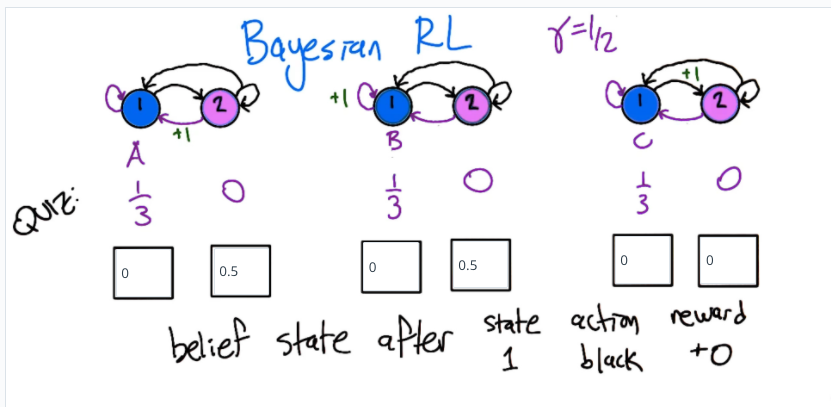

In [8]:
# Quiz: Bayesian RL - 2
Image('7-8_07.png')

In [ ]:
# Quiz: PSR Example - 2
# p(blue point) = 0.4 + 0.1 = 0.5
# p(red point) = 0.3 + 0.4 = 0.7

##  &#x1F916; &nbsp;  <span style="color:red"> Lesson 10. Options</span>

The concept of hierarchy has strong intuitive appeal to artificial intelligence researchers. Humans cope with the extraordinary complexity of the real world in part by thinking hierarchically, and we would like to imbue our autonomous agents with the same faculty. In the reinforcement learning (RL) community, this idea has taken shape in work on temporal abstraction, in which abstract actions represent sequences of lower-level actions.

##  &#x1F916; &nbsp;  <span style="color:red"> Examples. </span>

In [4]:
'''
# POMDPs.jl
using SARSOP, POMDPModels, POMDPToolbox

# initialize problem and solver
pomdp = TigerPOMDP() # from POMDPModels
solver = SARSOPSolver() # from SARSOP

# compute a policy
policy = solve(solver, pomdp)

#evaluate the policy
belief_updater = updater(policy) # the default QMPD belief updater (discrete Bayesian filter)
init_dist = initial_state_distribution(pomdp) # from POMDPModels
hist = HistoryRecorder(max_steps=100) # from POMDPToolbox
r = simulate(hist, pomdp, policy, belief_updater, init_dist) # run 100 step simulation
'''
''' '''

' '

WebPPL probabilistic programming online: http://webppl.org/

In [3]:
'''
# Posterior Sampling Reinforcement Learning (PSRL)
http://agentmodels.org/chapters/3d-reinforcement-learning.html

var observeState = function(state) { 
  return utility(state);
};


var makePSRLAgent = function(params, pomdp) {
  var utility = params.utility;

  // belief updating: identical to POMDP agent from Chapter 3c
  var updateBelief = function(belief, observation, action){
    return Infer({ model() {
      var state = sample(belief);
      var predictedNextState = transition(state, action);
      var predictedObservation = observeState(predictedNextState);
      condition(_.isEqual(predictedObservation, observation));
      return predictedNextState;
    }});
  };

  // this is the MDP agent from Chapter 3a
  var act = dp.cache(
    function(state) {
      return Infer({ model() {
        var action = uniformDraw(actions);
        var eu = expectedUtility(state, action);
        factor(1000 * eu);
        return action;
      }});
    });

  var expectedUtility = dp.cache(
    function(state, action) {
      return expectation(
        Infer({ model() {
          var u = utility(state, action);
          if (state.manifestState.terminateAfterAction) {
            return u;
          } else {
            var nextState = transition(state, action);
            var nextAction = sample(act(nextState));
            return u + expectedUtility(nextState, nextAction);
          }
        }}));
    });

  return { params, act, expectedUtility, updateBelief };
};


//NOTES:
//We simulate with a single agent. Whenever the agent takes actions,
//they are given a state (*believedState*) that contains the *latentState*.
//Since utility(s,a) just depends on *latentState.rewardGrid*, this is equivalent to giving
//them a reward function. If the agent is given the same starting state twice,
//then their old plans are re-used due to caching.

//(It might be a bit clearer to create the agent anew every episode. On the
//other hand, the current code is elegant and exploits caching.)

//People just reading this chapter will proably be confused by manifest/latent. 
//(We could bring the presentation closer to standard model-based RL
//where R and T are unknown. But it's not clear it's worth doing so.)



var simulatePSRL = function(startState, agent, numEpisodes) {
  var act = agent.act;
  var updateBelief = agent.updateBelief;
  var priorBelief = agent.params.priorBelief;

  var runSampledModelAndUpdate = function(state, priorBelief, numEpisodesLeft) {
    var sampledState = sample(priorBelief);
    var trajectory = simulateEpisode(state, sampledState, priorBelief, 'noAction');
    var newBelief = trajectory[trajectory.length-1][2];
    var newBelief2 = Infer({ model() {
      return extend(state, {latentState : sample(newBelief).latentState });
    }});
    var output = [trajectory];

    if (numEpisodesLeft <= 1){
      return output;
      } else {
      return output.concat(runSampledModelAndUpdate(state, newBelief2,
                                                    numEpisodesLeft-1));
    }
  };

  var simulateEpisode = function(state, sampledState, priorBelief, action) {
    var observation = observeState(state);
    var belief = ((action === 'noAction') ? priorBelief : 
                  updateBelief(priorBelief, observation, action));

    var believedState = extend(state, { latentState : sampledState.latentState });
    var action = sample(act(believedState));
    var output = [[state, action, belief]];

    if (state.manifestState.terminateAfterAction){
      return output;
    } else {
      var nextState = transition(state, action);
      return output.concat(simulateEpisode(nextState, sampledState, belief, action));
    }
  };
  return runSampledModelAndUpdate(startState, priorBelief, numEpisodes);
};


// Construct agent prior belief

// Combine manifest (fully observed) state with prior on latent state
var getPriorBelief = function(startManifestState, latentStateSampler){
  return Infer({ model() {
    return {
      manifestState: startManifestState, 
      latentState: latentStateSampler()};
  }});
};

// True reward function
var trueLatentReward = {
  rewardGrid : [
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 0],
      [ 0, 0, 0, 1]
    ]
};

// True start state
var startState = {
  manifestState: { 
    loc: [0, 0],
    terminateAfterAction: false,
    timeLeft: 8
  },
  latentState: trueLatentReward
};

// Agent prior on reward functions
var latentStateSampler = function() {
  var flat = getOneHotVector(16, randomInteger(16));
  return { 
    rewardGrid : [
      flat.slice(0,4), 
      flat.slice(4,8), 
      flat.slice(8,12), 
      flat.slice(12,16) ] 
  };
};

var priorBelief = getPriorBelief(startState.manifestState, latentStateSampler);

// Build agent (using 'pomdp' object defined above fold)
var agent = makePSRLAgent({ utility, priorBelief, alpha: 100 }, pomdp);

var numEpisodes = 10
var trajectories = simulatePSRL(startState, agent, numEpisodes);

var concatAll = function(list) {
  var inner = function (work, i) { 
    if (i < list.length-1) {
      return inner(work.concat(list[i]), i+1) 
    } else {
      return work;
    }
  }
  return inner([], 0); 
};

var badState = [[ { manifestState : { loc : "break" } } ]];

var trajectories = map(function(t) { return t.concat(badState);}, trajectories);
viz.gridworld(pomdp, {trajectory : concatAll(trajectories)});

'''
''' '''

' '

In [6]:
199.11/0.547

364.0036563071298